<a href="https://colab.research.google.com/github/elpapx/JOKR-Case-studio/blob/main/JOKR_CASE_STUDY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case Study - Pricing Analyst / Associate

## **Context** 

JOKR is focused on the retail industry, hence as a pricing analyst/associate it’s very
important to take a look at how the competition is doing, what strategies are they
following and how can we catch up with them.

Read.me: 

- **Barcode**: Unique identifier per product
- **Product Name**: Full product name
- **Category L1**: First layer of product groupings
- **Category L2**: Second layer of product groupings
- **COGS**: Cost of Goods Sold (cost to which we acquire the product to the supplier)
- **Retail Price**: Final Selling price of the product on our platform (JOKR Price)
- **Australia -> Mexico**: Fictional supermarkets’ prices (competitors)

## Case Questions

1. Doing some simple analysis, what’s the average margin generated by each
category? Focus only on Category Level 2. Point out the best and the worst
performer.
2. Based on your analysis, who is the cheapest benchmark and who is the most
expensive competitor. Would it make sense to follow one of these competitor’s
strategies? Why or why not?
3. From the previous answers, would you change something on the pricing strategy
of our products? Why? How would you calculate impact?
4. What is the pricing index (how high/low are we vs one competitor) on a category
level? *Select only ONE competitor
5. What is the competitiveness coverage from ALL our competitors? And how many
do we share with competitors?
6. What other analyses could you perform to identify pricing areas of opportunity?
Describe using your own words, no analyses needed.

## Deliverables 

1. No presentation is needed (we are measuring analytical skills, not graphic design).
If you feel more comfortable with a presentation, go ahead!
2. Answer the case questions in order of appearance
3. Share your backup XLSX / Google Sheets file (we want to understand your
knowledge on a spreadsheet)
4. Feel free to be creative as possible



In [1]:
#Pip install packages
!pip install -q xlrd
!pip install perfplot
!pip install -U -q PyDrive 

#PyDrive wrapper & import libraries
from google.colab import files 
from google.colab import auth
from google.colab import drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from oauth2client.client import GoogleCredentials

# import libraries etl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import perfplot
import cv2

     |████████████████████████████████| 224 kB 7.9 MB/s 
     |████████████████████████████████| 51 kB 4.5 MB/s 


In [6]:
#only if you need the code for auth.

#Auth GDRIVE
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#Import from GDRIVE the file 
file_id = '1yXgC0A9E3bDq1TnRiuROalOHGiNaTn79' #please if u want the access send me a email.
excel_name = 'Case Study Pricing Analyst_Associate.xlsx'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile(excel_name)


In [7]:
!ls -lha  # confirm import file 

total 56K
drwxr-xr-x 1 root root 4.0K Mar 24 18:17  .
drwxr-xr-x 1 root root 4.0K Mar 24 18:12  ..
-rw-r--r-- 1 root root  720 Mar 24 18:14  adc.json
-rw-r--r-- 1 root root  26K Mar 24 18:17 'Case Study Pricing Analyst_Associate.xlsx'
drwxr-xr-x 1 root root 4.0K Mar 24 18:14  .config
drwxr-xr-x 1 root root 4.0K Mar  9 14:48  sample_data


In [8]:
#Create the DataFrame 
df = pd.read_excel(excel_name)
df = df.rename(columns={df.columns[1]: 'Product',df.columns[5]: 'Price'})


--------- Info from the DataFrame---------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Barcode      141 non-null    float64
 1   Product      141 non-null    object 
 2   Category L1  141 non-null    object 
 3   Category L2  141 non-null    object 
 4   COGS         141 non-null    float64
 5   Price        141 non-null    float64
 6   Australia    82 non-null     float64
 7   Brazil       40 non-null     float64
 8   Canada       39 non-null     float64
 9   Denmark      58 non-null     float64
 10  Germany      90 non-null     float64
 11  Mexico       128 non-null    float64
dtypes: float64(9), object(3)
memory usage: 13.3+ KB
None


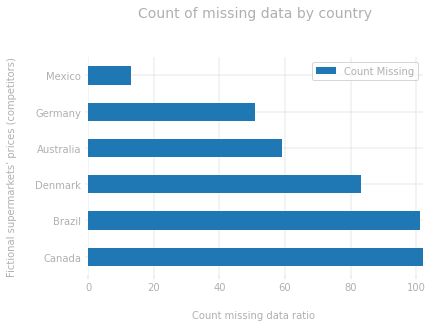

In [9]:
#Recognition data from excel on DataFrame
print('--------- Info from the DataFrame---------')
print(df.info())


#Count missing data 
na_df =  len(df.index) - df.count()  
na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
if df.isnull().sum().sum() != 0:
    na_df
    #Graph
    missing_data = pd.DataFrame({'Count Missing' :na_df})
    missing_data.plot(kind = "barh")
    #Adds
    plt.title('Count of missing data by country')
    plt.ylabel('Fictional supermarkets’ prices (competitors)')
    plt.xlabel('Count missing data ratio ')
    plt.show()

In [11]:
#Q1
df_1 = df.iloc[:, 1:6] # filter category l2 
#Computation
df_1 = df_1.groupby(['Category L2']).mean()
df_1['Average Margin'] = df_1['Price'] - df_1['COGS']  #create new column 'average' 
df_1 = df_1.sort_values(by='Average Margin', ascending = False)
#Print Results
print('\n', 'the best perfomance:', '\n', df_1.head(1))
print('\n', 'the worst perfomance:', '\n', df_1.tail(1))



 the best perfomance: 
                    COGS   Price  Average Margin
Category L2                                    
Spirits      421.318333  584.75      163.431667

 the worst perfomance: 
                 COGS   Price  Average Margin
Category L2                                 
Chocolate    56.8575  56.375         -0.4825


In [ ]:
#Q2
df_l3 = df.iloc[:, 1:12]
#Computation
df_l3 = df_l3.groupby(['Category L2']).mean() #we need to agroup the categories for means

def var_index(original_df, sectors, countries): #this function calculates the variation of our prices with respect to the competition
  sector_df = original_df
  for country in countries:
    sector_df[f"Var. {country}"] = ((sector_df['Price'] - sector_df[f"{country}"])/sector_df['Price']) * 100
  return sector_df

countries = ['Australia', 'Brazil', 'Canada', 'Denmark', 'Germany', 'Mexico']
df_var = var_index(df_l3,['Category L1'], countries).fillna(0)

print('cheapest product:', '', df_var['Var. Australia'].min()) # if u want the min and max value can you change the name
print('expensive product:', '', df_var['Var. Australia'].max()) 




In [ ]:
#Q2
df_bench = df.iloc[:, 1:12]
df_bench = df_bench.groupby(['Category L1', 'Category L2', 'Product']).mean()
df_bench = df_bench.sort_values(by='Category L1', ascending = True)
df_bench = pd.pivot_table(df_bench, values=['Australia','Brazil', 'Canada', 'Denmark', 'Germany', 'Price', 'Mexico'], index=['Category L1', 'Category L2', 'Product'],fill_value=0)

def create_sector_df(original_df, sectors, countries):
  sector_df = original_df.loc[tuple(sectors)]
  for country in countries:
    sector_df[f"Var. {country}"] = ((sector_df['Price'] - sector_df[f"{country}"])/sector_df['Price']) * 100
  return sector_df

countries = ['Australia', 'Brazil', 'Canada', 'Denmark', 'Germany', 'Mexico']

print(create_sector_df(df_bench, ['Beer, Wine & Spirits', 'Spirits'], countries))
print(create_sector_df(df_bench, ['Snacks & Sweets', 'Chocolate'], countries))




In [21]:
#Q4
#Filter pricing index: 'Beer, Wine & Spirits', ['Mexico', 'Price']]
df_table = df.iloc[:, 1:12]
table = pd.pivot_table(df_table, values=['Australia','Brazil', 'Canada', 'Denmark', 'Germany', 'Price', 'Mexico'], index=['Category L1', 'Category L2', 'Product'],fill_value=0)
table_alch = table.loc['Beer, Wine & Spirits', ['Mexico', 'Price']]
table_alch['price_Index'] = (table_alch['Mexico'] / table_alch['Price'])*100
table_alch = table_alch.sort_values(by=['Category L2', 'price_Index'], ascending = False)
table_alch

#Filter pricing index: '' ['Mexico', 'Price']]
df_table_filter = df_table['price_Index'] = (df_table['Mexico'] / df_table['Price']) * 100
df_table_filter = df_table.sort_values(by='price_Index', ascending = False)
print(df_table_filter.tail(20))
df_table_filter.head()


                                               Product           Category L1  \
107                                 Papaya Maradol 1pz    Fruit & Vegetables   
95                                     Melon Chino 1pz    Fruit & Vegetables   
4                                    Aguacate Hass 1kg    Fruit & Vegetables   
99                                         Naranja 1kg    Fruit & Vegetables   
52                 Desodorante Obao Roll-On Floral 65g                Beauty   
94                                    Manzana Roja 1kg    Fruit & Vegetables   
24                        Cebollita Cambray Manojo 1pz    Fruit & Vegetables   
6                            Axion Limón Líquido 900ml    Household Supplies   
8    Barras De Amaranto Con Chocolate Aires de Camp...      Staples & Pantry   
29        Cerveza Bohemia Weizen 6 Pack  Botella 355ml  Beer, Wine & Spirits   
35         Cerveza Michelob Ultra Botella 6 Pack 355ml  Beer, Wine & Spirits   
56      Electrolit Suero Rehidratante Fr

,Product,Category L1,Category L2,COGS,Price,Australia,Brazil,Canada,Denmark,Germany,Mexico,price_Index
43,Coca Cola sin Azúcar 2.5lt,Beverages,Soft Drinks,18.00,26.0,23.7,NaN,27.90,NaN,NaN,40.8,156.923077
101,Nuez En Mitades Aires de Campo 150g,Snacks & Sweets,Snacks,84.45,106.0,145.0,140.0,NaN,NaN,NaN,152.0,143.396226
40,Chocolate Ferrero Rocher 16pz,Snacks & Sweets,Chocolate,139.43,102.0,133.5,NaN,NaN,120.00,NaN,130.0,127.450980
48,Crema Para Peinar Sedal Liso 300ml,Beauty,Personal Care,23.83,37.0,36.9,42.0,NaN,NaN,NaN,43.5,117.567568
51,Desodorante Axe Aerosol Dark Temp 150ml,Beauty,Personal Care,34.35,49.0,115.0,NaN,55.49,45.84,NaN,55.5,113.265306


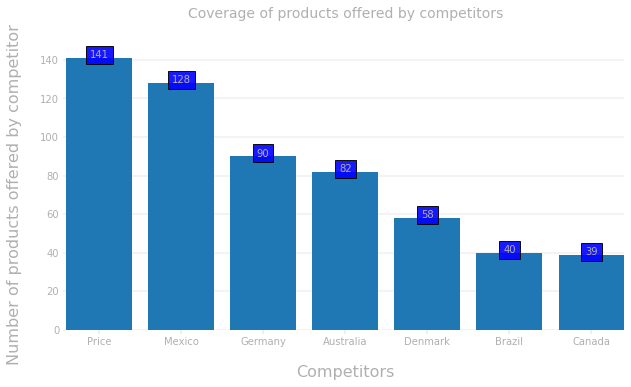

In [22]:
#Q5

#Multiplier
multiplier = len(df['Price']) / df.count()  #we offer 3.6x products than canada and 3.5x than Brazil 

#Participation in the market 
df_part = (df.count() / len(df)) 

#Number of products offered by the competitors and 
def addlabels(key, values):
  for i in range(len(key)):
    plt.text(i,values[i],values[i], ha = 'center',
             Bbox = dict(facecolor = 'blue', alpha =.9))

if __name__ == '__main__':
  key = ['Price','Mexico','Germany','Australia', 'Denmark', 'Brazil', 'Canada']
  values = [141, 128, 90, 82,  58, 40, 39,]
  plt.figure(figsize = (10,5))
  plt.bar(key, values)
  addlabels(key, values)
  plt.title('Coverage of products offered by competitors')
  plt.ylabel('Number of products offered by competitor', fontsize=16) #Armonia 10
  plt.xlabel('Competitors', fontsize=16) #Mix linda maria
  plt.show()


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


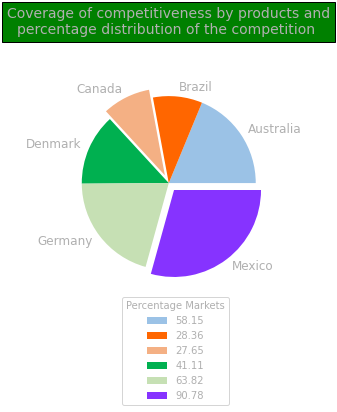

In [23]:
#Q5
labels = ['Australia', 'Brazil', 'Canada', 'Denmark', 'Germany','Mexico']
values = [58.15, 28.36, 27.65, 41.11, 63.82, 90.78]

plt.figure(figsize=plt.figaspect(1))

plt.pie(values, labels=labels,
        explode=[0, 0, 0.1 , 0, 0, 0.1 ],
        textprops={"family": "Arial", "size": 12},
        radius = 1,
         colors = ["#9BC2E6", "#FF6600", "#F4B084", "#00B050", "#C6E0B4", "#8633FF"]
        )
plt.legend(values, loc="best",
           bbox_to_anchor=(0.8,0),
           title="Percentage Markets")
plt.title("Coverage of competitiveness by products and\n" + "percentage distribution of the competition ", bbox={'facecolor':'green', 'pad':5})
plt.show()



In [24]:
#Q6
"""
to see how competitor prices influence your sales,
you need to determine the average price index for each competitor.
"""
table_index = table.copy()
table_index['Price_Index'] = (table_index['Australia'] +
                              table_index['Brazil'] +
                              table_index['Canada'] + 
                              table_index['Denmark'] + 
                              table_index['Germany'] +
                              table_index['Mexico'])/6


# Solution Case




###1. Doing some simple analysis, what’s the average margin generated by each category? Focus only on Category Level 2. Point out the best and the worst performer.



  In the following table you can see the best and worst performance of the average margin by category 2:
<br>
</br>

 <center>Table 1. Category 2: The best and worst performer.</center>

|Perfomance|Category|COGS|Retail Price| Avg. Margin|
|----------|------|------|------------|---------------|
|**Best**|Spirits| 421.31&#36; | 584.755&#36;|163.43&#36;|
|**Worst**|Chocolate| 58.85&#36;| 56.37&#36;|-0.48&#36;|

  ### A couple of facts...

>
> ### In the worst category, 42.85% from the competitor products don't contain information, while the best performer doesn't contain 40.40%.
>
>

  Can be explained for two reasons:

>- We don't have information for the products.
>- Or really, the competitors don't cover the demand for these products.

### 2. Based on your analysis, who is the cheapest benchmark and who is the most expensive competitor. Would it make sense to follow one of these competitor’s strategies? Why or why not?



### **Some points...** 


  - The best performance product and expensive **Ron Bacardí Carta Blanca Superior 980ml** with a price of US$250, maintains a variation of 13.71%, with respect to our prices. (Germany Competitor)

  - The best performance product and cheapest **Ron Zacapa 23 Años 750ml** with a price of US$669, maintains a variation of 37.18%, with respect to our prices. (Australia Competitor)

- If we analyze grouping by Categories L1 and L2 we get the following:

  - Category L1.  
 
   -  **Mother & Baby**: The average price of our Canadian competitor is US$149, the category is 173.39% more expensive than our average prices.
       The average price of our Brazilian competitor US$12.5, the category is 77.06% more cheap than your average prices.
  
 - Category L2   
  
   -  **Medical Supplies** the average price is US$235, the category is 206.18% more expensive than our average prices. (Brazil competitor)

   -  **Food Supplement** the average price is US$50, the category is 82.65% more cheap than our average prices. (Brazil competitor)

**Note**. the tables are attached.

The following table represent the best and worst product performance, this table include the benchmark for the expensive and cheapest product which is represented by the for a variation of prices:


<center> Table 2. Benchmark cheapest and expensive, product and competitor.  </center>

|Perfomance|benchmark|Category|Description category|Competitor|Product|Variation|
|-|-|-|-|-|-|-|
|The worst|Expensive|Category L2|Chocolate|Australia|**Chocolate Ferrero Rocher 16pz**|30.88&percnt;|
|The worst|Cheapest|Category L2|Chocolate|Australia|**Pastelito Kinder Delice Cacao 39 g**|23.07&percnt;|
|The best|Expensive|Category L2|Spirit|Germany|**Ron Bacardí­ Carta Blanca Superior 980ml**|13.71&percnt;|
|The best|Cheapest|Category L2|Spirit|Australia|**Ron Zacapa 23 Años 750ml**|37.18&percnt;|




####Would it make sense to follow one of these competitor’s strategies? Why or why not?

   ### **No**

> We have the prices... but... What else do we know about the competitors? what about the consumer? 

To know how the competitor make a stratregy of pricing. We need try to understand about the groups based on different traits that they share. 

- Demographic Segmentation
  - Age.
  - Sex.
  - Education Level.
  - Income.
- Behavioral Segmentation
  - Online shopping habits
  - Actions taken on a website
  - Loyalty
 
Consequently, we shouldn'tº follow the strategies of our competitors due to asymmetric information.


### 3. From the previous answers, would you change something on the pricing strategy of our products? Why? How would you calculate impact?



Yes, pricing is the cornerstone of our monetization strategy. Changes can help us improve aspects of our business. But, that's a pretty big deal and a decision not to be taken lightly.

>
>According to Continuum's Jeanne Hopkins, a 1% change in your pricing plan can >increase your bottom line by as much as 12.70%. But 1% changes in retention >and acquisition only improve their results by 6.71% and 3.32%, respectively. 
>

Why? Because we have full coverage of the products in the market, however, competitors maintain a competitive advantage over some products (see point 2), for example the best price performance is held by an Australian competitor.

#### How would you calculate impact? 

gather information about how your pricing structure has changed over time.

1. Price elasticity for optimal pricing for product.
2. Design and analyze a survey-based pricing study to develop a price elasticity and price point.
3. Prediction of the impact on demand after a variation in prices based on a linear or multiple regression analysis model-
4. prediction of the break-even point by product based on a model of simultaneous equations.


### 4. What is the pricing index (how high/low are we vs one competitor) on a category level? *Select only ONE competitor

We will analyze the pricing index using category 1, since it contains the category with the best performance, according to the solution to question 1. We choose the competitor Mexico, because it is the one that offers the most products compared to the rest of the competitors.

- Our **Ron Bacardí Carta Blanca superior 980ml** product is 10.17% cheaper than the competitor. 

- Our competitor in this analysis with the product **Cerveza Corona Light Laton 4 Pack 473ml** sells  32.35% cheaper than us

It should be noted that the main objective of the price index is to find the direct relationship between the prices of the same product. 

- We have three products with the competitor in which we find a direct relationship.

  - Ron Kraken 750ml
  - Cerveza Bohemia Clásica 6 Pack Botella 355ml
  - Cerveza Sol Clamato Lata 473ml
<br>
</br>

<center> Tabla 3. Pricing Index for category </center>

|Category L2|Product name|Mexico|Retail Price|Price Index|
|---|---|---|---|---|
|Spirits|Ron Bacardí­ Carta Blanca Superior 980ml|249\.0&#36;|226\.0&#36;|110\.17|
|Spirits|Ginebra Bombay Sapphire 750ml|555\.0&#36;|535\.0&#36;|103\.73|
|Spirits|Ron Kraken 750ml|175\.0&#36;|175\.0&#36;|100\.0|
|Spirits|Mezcal 400 Conejos Reposado 750ml|599\.0&#36;|602\.0&#36;|99\.50|
|Spirits|Ron Zacapa 23 Años 750ml|1059\.0&#36;|1065\.0&#36;|99\.43|
|Spirits|Mezcal 400 Conejos Tobala 750ml|679\.0&#36;|689\.0&#36;|98\.54|
|Spirits|Mezcal Joven Montelobos 100% Agave 750ml|635\.0&#36;|645\.0&#36;|98\.44|
|Spirits|Ginebra Mom 700ml|545\.0&#36;|555\.0&#36;|98\.19|
|Spirits|Ginebra Bulldog 750ml|659\.0&#36;|730\.0&#36;|90\.27|
|Spirits|Ron Bacardi Blanco 1\.750ml|319\.0&#36;|378\.0&#36;|84\.39|
|Spirits|Fitzer Hard Seltzer Mango 4 Pack 355ml|0\.0&#36;|112\.0&#36;|0\.0|
|Spirits|Ginebra Monkey 47 Seca 500ml|0\.0&#36;|1305\.0&#36;|0\.0|
|Beer|Cerveza Bohemia Clásica 6 Pack Botella 355ml|111\.0&#36;|111\.0&#36;|100\.0|
|Beer|Cerveza Sol Clamato Lata 473ml|22\.0&#36;|22\.0&#36;|100\.0|
|Beer|Cerveza Oscura Indio Botella 6 Pack 355ml|96\.0&#36;|104\.0&#36;|92\.30|
|Beer|Cerveza Ambar Dos Equis Botella 6 Pack 355ml|102\.0&#36;|120\.0&#36;|85\.0|
|Beer|Cerveza Carta Blanca Caguamita Botella 6 Pack 300ml|55\.0&#36;|67\.0&#36;|82\.08|
|Beer|Cerveza Clara Dos Equis Lager Special Botella 6 Pack 355ml|108\.0&#36;|140\.0&#36;|77\.14|
|Beer|Cerveza Jabali Bock 330ml|28\.0&#36;|38\.0&#36;|73\.68|
|Beer|Cerveza Heineken 6 Pack Botella 355ml|100\.0&#36;|137\.0&#36;|72\.99|
|Beer|Cerveza Corona Light Laton 4 Pack 473ml|69\.0&#36;|102\.0&#36;|67\.647|
|Beer|Cerveza Bohemia Weizen 6 Pack  Botella 355ml|0\.0&#36;|105\.0&#36;|0\.0|
|Beer|Cerveza Michelob Ultra Botella 6 Pack 355ml|0\.0&#36;|127\.3&#36;|0\.0|

<br>

</br>

#### If we want to know how high/low are we for a product with the same competitor.

<center> Tabla 4. Pricing Index for products  </center>

|Category L2|Product name|Mexico|Retail Price|Price Index|
|---|---|---|---|---|
|Soft Drinks|Coca Cola sin Azúcar 2\.5lt|26\.0&#36;|40\.8&#36;|156\.92|
|Fresh Vegetables|Cebollita Cambray Manojo 1pz|29.00&#36;|9.9&#36;|34.13|



### 5. What is the <competitiveness coverage from ALL our competitors? And how many do we share with competitors

<left> Graph 1. Number of products offered by the competitor </left>

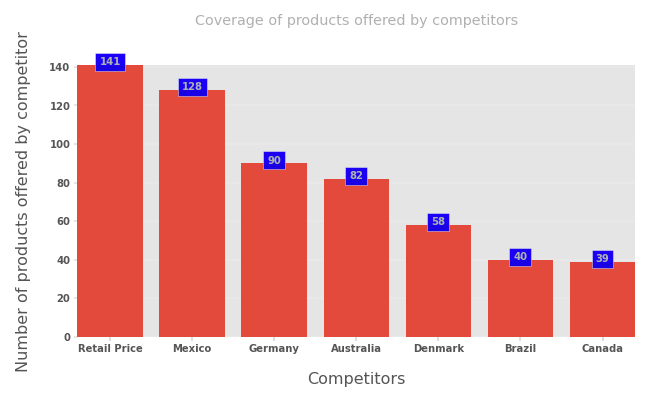

<left> Graph 2. Coverage of competitiveness by products percentage distribution (Share with the competitors) </left>

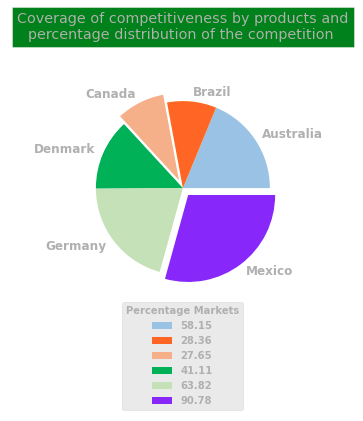

### 6. What other analyses could you perform to identify pricing areas of opportunity? Describe using your own words, no analyses needed.

1. SWOT analysis
2. Porter analysis 
3. Foreign markets analysis
4. Environment analysis


# 7. APPEND 



 <center> Table 5 - Cheapest and expensive competitor for the best perfomance</center>

|Product name|Australia|Brazil|Canada|Denmark|Germany|Mexico|Retail Price|Var\. Australia|Var\. Brazil|Var\. Canada|Var\. Denmark|Var\. Germany|Var\. Mexico|
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
|Fitzer Hard Seltzer Mango 4 Pack 355ml|98\.0&#36;|98\.0&#36;|0\.0&#36;|0\.0&#36;|98\.0&#36;|0\.0&#36;|112\.0&#36;|12\.5&percnt;|12\.5&percnt;|100\.0&percnt;|100\.0&percnt;|12\.5&percnt;|100\.0&percnt;|
|Ginebra Bombay Sapphire 750ml|0\.0&#36;|549\.0&#36;|0\.0&#36;|509\.87&#36;|564\.0&#36;|555\.0&#36;|535\.0&#36;|100\.0&percnt;|-2\.61&percnt;|100\.0&percnt;|4\.69&percnt;|-5\.42&percnt;|-3\.73&percnt;|
|Ginebra Bulldog 750ml|621\.0&#36;|0\.0&#36;|0\.0&#36;|642\.0&#36;|658\.0&#36;|659\.0&#36;|730\.0&#36;|14\.93&#36;|100\.0&percnt;|100\.0&percnt;|12\.05&percnt;|9\.86&percnt;|9\.72&percnt;|
|Ginebra Mom 700ml|475\.0&#36;|0\.0&#36;|0\.0&#36;|569\.0&#36;|0\.0&#36;|545\.0&#36;|555\.0&#36;|14\.41&percnt;|100\.0&percnt;|100\.0&percnt;|-2\.52&percnt;|100\.0&percnt;|1\.80&percnt;|
|Ginebra Monkey 47 Seca 500ml|1187\.0&#36;|0\.0&#36;|0\.0&#36;|1163\.0&#36;|1331\.0&#36;|0\.0&#36;|1305\.0&#36;|9\.04&percnt;|100\.0&percnt;|100\.0&percnt;|10\.88&percnt;|-1\.99&percnt;|100\.0&percnt;|
|Mezcal 400 Conejos Reposado 750ml|585\.0&#36;|0\.0&#36;|0\.0&#36;|612\.0&#36;|0\.0&#36;|599\.0&#36;|602\.0&#36;|2\.82&percnt;|100\.0&percnt;|100\.0&percnt;|-1\.66&percnt;|100\.0&percnt;|0\.49&percnt;|
|Mezcal 400 Conejos Tobala 750ml|679\.0&#36;|0\.0&#36;|0\.0&#36;|695\.0&#36;|0\.0&#36;|679\.0&#36;|689\.0&#36;|1\.45&percnt;|100\.0&percnt;|100\.0&percnt;|-0\.87&percnt;|100\.0&percnt;|1\.45&percnt;|
|Mezcal Joven Montelobos 100% Agave 750ml|0\.0&#36;|0\.0&#36;|684\.99&#36;|0\.0&#36;|594\.0&#36;|635\.0&#36;|645\.0&#36;|100\.0&percnt;|100\.0&percnt;|-6\.20&percnt;|100\.0&percnt;|7\.90&percnt;|1\.55&percnt;|
|Ron Bacardi Blanco 1\.750ml|0\.0&#36;|362\.0&#36;|0\.0&#36;|0\.0&#36;|372\.0&#36;|319\.0&#36;|378\.0&#36;|100\.0&percnt;|4\.23&percnt;|100\.0&percnt;|100\.0&percnt;|1\.58&percnt;|15\.60&percnt;|
|Ron Bacardí­ Carta Blanca Superior 980ml|250\.0&#36;|0\.0&#36;|0\.0&#36;|0\.0&#36;|257\.0&#36;|249\.0&#36;|226\.0&#36;|-10\.61&percnt;|100\.0&percnt;|100\.0&percnt;|100\.0&percnt;|-13\.71&percnt;|-10\.17&percnt;|
|Ron Kraken 750ml|170\.0&#36;|0\.0&#36;|0\.0&#36;|0\.0&#36;|187\.0&#36;|175\.0&#36;|175\.0&#36;|2\.85&percnt;|100\.0&percnt;|100\.0&percnt;|100\.0&percnt;|-6\.85&percnt;|0\.0&percnt;|
|Ron Zacapa 23 Años 750ml|669\.0&#36;|0\.0&#36;|0\.0&#36;|0\.0&#36;|1133\.0&#36;|1059\.0&#36;|1065\.0&#36;|37\.18&percnt;|100\.0&percnt;|100\.0&percnt;|100\.0&percnt;|-6\.38&percnt;|0\.56&percnt;|

**<center> Table 6 - Cheapest and expensive competitor for the WORST perfomance</center>**


|Product name|Australia|Brazil|Canada|Denmark|Germany|Mexico|Retail Price|Var\. Australia|Var\. Brazil|Var\. Canada|Var\. Denmark|Var\. Germany|Var\. Mexico|
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
|Chocolate Abuelita Tableta 90g 6pz|0\.0&#36;|0\.0&#36;|81\.49&#36;|90\.25&#36;|0\.0&#36;|78\.0&#36;|90\.5&#36;|100\.0&percnt;|100\.0&percnt;|9\.95&percnt;|0\.27&percnt;|100\.0&percnt;|13\.81&percnt;|
|Chocolate Ferrero Rocher 16pz|133\.5&#36;|0\.0&#36;|0\.0&#36;|120\.0&#36;|0\.0&#36;|130\.0&#36;|102\.0&#36;|-30\.88&percnt;|100\.0&percnt;|100\.0&percnt;|-17\.64&percnt;|100\.0&percnt;|-27\.45&percnt;|
|Chocolate Milky Way Bar 48g|18\.0&#36;|0\.0&#36;|0\.0&#36;|0\.0&#36;|20\.8&#36;|19\.5&#36;|20\.0&#36;|10\.0&percnt;|100\.0&percnt;|100\.0&percnt;|100\.0&percnt;|-4\.0&percnt;|2\.5&percnt;|
|Pastelito Kinder Delice Cacao 39 g|10\.0&#36;|0\.0&#36;|0\.0&#36;|0\.0&#36;|12\.0&#36;|12\.9&#36;|13\.0&#36;|23\.07&percnt;|100\.0&percnt;|100\.0&percnt;|100\.0&percnt;|7\.69&percnt;|0\.76&percnt;|


 <center>Table 7 -- Cheapest and expensive competitor for CATEGORY L1</center>


|Category L1|Retail Price|Australia|Brazil|Canada|Denmark|Germany|Mexico|Var\. Australia|Var\. Brazil|Var\. Canada|Var\. Denmark|Var\. Germany|Var\. Mexico|
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
|Bakery|38\.0&#36;|35\.83&#36;|33\.5&#36;|0.0&#36;|40\.3&#36;|36\.43&#36;|34\.15|5\.70&percnt;|11\.84&percnt;|0.0&percnt;|-6\.05&percnt;|4\.12&percnt;|10\.13&percnt;|
|Beauty|44\.38&#36;|56\.33&#36;|33\.5&#36;|50\.065&#36;|38\.056&#36;|37\.2&#36;|41\.57&#36;|-26\.92&percnt;|24\.53&percnt;|-12\.78&percnt;|14\.26&percnt;|16\.19&percnt;|6\.33&percnt;|
|Beer, Wine & Spirits|351\.75&#36;|310\.38&#36;|243\.2&#36;|158\.778&#36;|606\.51|345\.93&#36;|324\.47&#36;|11\.75&#36;|30\.86&percnt;|54\.86&percnt;|-72\.42&percnt;|1\.65&percnt;|7\.75&percnt;|
|Beverages|16\.04&#36;|14\.83&#36;|13\.91&#36;|12\.04&#36;|15\.50&#36;|15\.32&#36;|15\.47&#36;|7\.52&percnt;|13\.26&percnt;|24\.91&percnt;|3\.38&percnt;|4\.46&percnt;|3\.54&percnt;|
|Dairy & Chilled|57\.46&#36;|56\.58&#36;|44\.75&#36;|35\.73&#36;|17\.31&#36;|72\.47&#36;|53\.67&#36;|1\.52&percnt;|22\.12&percnt;|37\.81&percnt;|69\.86&percnt;|-26\.11&percnt;|6\.59&percnt;|
|Frozen|89\.36&#36;|63\.87&#36;|53\.5&#36;|69\.3&#36;|57\.42&#36;|79\.67&#36;|71\.63&#36;|28\.52&percnt;|40\.13&percnt;|22\.45&percnt;|35\.73&percnt;|10\.83&percnt;|19\.83&percnt;|
|Fruit & Vegetables|70\.05&#36;|39\.48&#36;|47\.45&#36;|58\.25&#36;|28\.73&#36;|42\.56&#36;|36\.08&#36;|43\.64&percnt;|32\.27&percnt;|16\.84&percnt;|58\.98&percnt;|39\.24&percnt;|48\.49&percnt;|
|Health|115\.05&#36;|117\.6&#36;|217\.75&#36;|47\.59&#36;|53\.56&#36;|63\.68&#36;|137\.42&#36;|-2\.21&percnt;|-89\.25&percnt;|58\.63&percnt;|53\.44&percnt;|44\.64&percnt;|-19\.44&percnt;|
|Household Supplies|95\.75&#36;|91\.0&#36;|48\.0&#36;|0.0&#36;|145\.5&#36;|94\.55&#36;|0.0&#36;|4\.96&percnt;|49\.86&percnt;|0.0&percnt;|-51\.95&percnt;|1\.25&percnt;|0.0&percnt;|
|Mother & Baby|54\.5&#36;|12\.9&#36;|12\.5&#36;|149\.0&#36;|13\.54&#36;|89\.75&#36;|75\.95&#36;|76\.33&percnt;|77\.06&percnt;|-173\.39&percnt;|75\.14&percnt;|-64\.67&percnt;|-39\.35&percnt;|
|Pet Supplies|12\.1&#36;|11\.4&#36;|0.0&#36;|0.0&#36;|0.0&#36;|11\.9&#36;|11\.3&#36;|5\.78&percnt;|0.0&percnt;|0.0&percnt;|0.0&percnt;|1\.65&percnt;|6\.61&percnt;|
|Snacks & Sweets|46\.59&#36;|47\.86&#36;|55\.76&#36;|75\.74&#36;|48\.53&#36;|31\.65&#36;|49\.14&#36;|-2\.72&percnt;|-19\.67&percnt;|-62\.55&percnt;|-4\.17&percnt;|32\.05&percnt;|-5\.47&percnt;|
|Staples & Pantry|41\.23&#36;|40\.96&#36;|0.0&#36;|40\.33&#36;|30\.74&#36;|43\.28&#36;|38\.90&#36;|0\.65&percnt;|0.0&percnt;|2\.19&percnt;|25\.44&percnt;|-4\.96&percnt;|5\.64&percnt;|


 <center>Table 8 - Cheapest and expensive competitor for CATEGORY L2</center>

|Category L2|Retail Price|Australia|Brazil|Canada|Denmark|Germany|Mexico|Var\. Australia|Var\. Brazil|Var\. Canada|Var\. Denmark|Var\. Germany|Var\. Mexico|
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
|Beer|97\.57&#36;|94\.77&#36;|103\.5&#36;|27\.22&#36;|54\.7&#36;|85\.86&#36;|76\.77&#36;|2\.86&percnt;|-6\.07&percnt;|72\.09&percnt;|43\.93&percnt;|12\.00&percnt;|21\.31&percnt;|
|Biscuits & Crackers|37\.0&#36;|31\.9&#36;|0\.0&#36;|0\.0&#36;|0\.0&#36;|47\.2&#36;|31\.9&#36;|13\.78&percnt;|0\.0&percnt;|0\.0&percnt;|0\.0&percnt;|-27\.56&percnt;|13\.78&percnt;|
|Breakfast & Pastries|26\.0&#36;|29\.2&#36;|21\.5&#36;|0\.0&#36;|0\.0&#36;|31\.4&#36;|26\.0&#36;|-12\.30&percnt;|17\.30&percnt;|0\.0&percnt;|0\.0&percnt;|-20\.76&percnt;|0\.0&percnt;|
|Breakfast Cereals & Spreads|66\.5&#36;|66\.5&#36;|0\.0&#36;|84\.0&#36;|44\.4&#36;|67\.05&#36;|66\.75&#36;|0\.0&percnt;|0\.0&percnt;|-26\.3&percnt;|33\.23&percnt;|-0\.82&percnt;|-0\.37&percnt;|
|Canned Dry & Packaged Foods|39\.5&#36;|15\.0&#36;|0\.0&#36;|58\.0&#36;|9\.64&#36;|39\.3&#36;|34\.25&#36;|62\.02&percnt;|0\.0&percnt;|-46\.83&percnt;|75\.59&percnt;|0\.50&percnt;|13\.29&percnt;|
|Canned Food|34\.75&#36;|28\.95&#36;|0\.0&#36;|26\.32&#36;|27\.34&#36;|37\.3&#36;|34\.62&#36;|16\.69&percnt;|0\.0&percnt;|24\.23&percnt;|21\.30&percnt;|-7\.33&percnt;|0\.35&percnt;|
|Cheese|107\.0&#36;|88\.25&#36;|0\.0&#36;|0\.0&#36;|0\.0&#36;|111\.5&#36;|88\.25&#36;|17\.52&percnt;|0\.0&percnt;|0\.0&percnt;|0\.0&percnt;|-4\.20&percnt;|17\.52&percnt;|
|Chocolate|56\.37&#36;|53\.83&#36;|0\.0&#36;|81\.49&#36;|105\.12&#36;|16\.4&#36;|60\.1&#36;|4\.50&percnt;|0\.0&percnt;|-44\.54&percnt;|-86\.47&percnt;|70\.90&percnt;|-6\.60&percnt;|
|Deli & Cooked Meat|93\.0&#36;|69\.0&#36;|107\.5&#36;|60\.0&#36;|0\.0&#36;|92\.2&#36;|83\.5&#36;|25\.80&percnt;|-15\.59&percnt;|35\.48&percnt;|0\.0&percnt;|0\.86&percnt;|10\.21&percnt;|
|Diapering & Potty|136\.5&#36;|0\.0&#36;|0\.0&#36;|149\.0&#36;|0\.0&#36;|167\.0&#36;|139\.0&#36;|0\.0&percnt;|0\.0&percnt;|-9\.15&percnt;|0\.0&percnt;|-22\.34&percnt;|-1\.83&percnt;|
|Digestive Health|20\.0&#36;|20\.9&#36;|22\.0&#36;|0\.0&#36;|21\.38&#36;|0\.0&#36;|0\.0&#36;|-4\.49&percnt;|-10\.0&percnt;|0\.0&percnt;|-6\.89&percnt;|0\.0&percnt;|0\.0&percnt;|
|Dips, Dressings & Sauces|52\.5&#36;|56\.5&#36;|0\.0&#36;|57\.49&#36;|0\.0&#36;|0\.0&#36;|56\.5&#36;|-7\.61&percnt;|0\.0&percnt;|-9\.50&percnt;|0\.0&percnt;|0\.0&percnt;|-7\.61&percnt;|
|Dishwashing|49\.5&#36;|30\.0&#36;|48\.0&#36;|0\.0&#36;|0\.0&#36;|42\.1&#36;|0\.0&#36;|39\.39&percnt;|3\.03&percnt;|0\.0&percnt;|0\.0&percnt;|14\.94&percnt;|0\.0&percnt;|
|Dried Goods|22\.5&#36;|0\.0&#36;|0\.0&#36;|21\.0&#36;|20\.9&#36;|0\.0&#36;|21\.0&#36;|0\.0&percnt;|0\.0&percnt;|6\.66&percnt;|7\.11&percnt;|0\.0&percnt;|6\.66&percnt;|
|Food Supplement|288\.25&#36;|529\.0&#36;|546\.0&#36;|47\.59&#36;|0\.0&#36;|50\.0&#36;|287\.0&#36;|-83\.52&percnt;|-89\.41&percnt;|83\.49&percnt;|0\.0&percnt;|82\.65&percnt;|0\.43&percnt;|
|Fresh Bread|48\.5&#36;|44\.5&#36;|45\.5&#36;|0\.0&#36;|40\.3&#36;|47\.2&#36;|43\.22&#36;|8\.24&percnt;|6\.18&percnt;|0\.0&percnt;|16\.90&percnt;|2\.68&percnt;|10\.87&percnt;|
|Fresh Cream|36\.0&#36;|31\.2&#36;|29\.0&#36;|0\.0&#36;|0\.0&#36;|30\.5&#36;|34\.0&#36;|13\.33&percnt;|19\.44&percnt;|0\.0&percnt;|0\.0&percnt;|15\.27&percnt;|5\.55&percnt;|
|Fresh Fruit|68\.75&#36;|46\.97&#36;|61\.0&#36;|49\.9&#36;|38\.15&#36;|26\.4&#36;|33\.23&#36;|31\.67&percnt;|11\.27&percnt;|27\.41&percnt;|44\.50&percnt;|61\.6&percnt;|51\.66&percnt;|
|Fresh Milk|26\.78&#36;|25\.25&#36;|22\.8&#36;|21\.68&#36;|17\.31&#36;|24\.85&#36;|25\.08&#36;|5\.73&percnt;|14\.87&percnt;|19\.06&percnt;|35\.35&percnt;|7\.22&percnt;|6\.35&percnt;|
|Fresh Vegetables|29\.0&#36;|9\.5&#36;|0\.0&#36;|0\.0&#36;|9\.9&#36;|0\.0&#36;|9\.9&#36;|67\.24&percnt;|0\.0&percnt;|0\.0&percnt;|65\.86&percnt;|0\.0&percnt;|65\.86&percnt;|
|Frozen Fruit|74\.5&#36;|54\.0&#36;|66\.0&#36;|0\.0&#36;|53\.9&#36;|59\.4&#36;|54\.0&#36;|27\.51&percnt;|11\.40&percnt;|0\.0&percnt;|27\.65&percnt;|20\.26&percnt;|27\.51&percnt;|
|Frozen Meat|176\.5&#36;|0\.0&#36;|0\.0&#36;|103\.95&#36;|0\.0&#36;|127\.75&#36;|112\.0&#36;|0\.0&percnt;|0\.0&percnt;|41\.10&percnt;|0\.0&percnt;|27\.62&percnt;|36\.54&percnt;|
|Frozen Vegetables|42\.33&#36;|38\.25&#36;|41\.0&#36;|0\.0&#36;|35\.0&#36;|42\.6&#36;|38\.66&#36;|9\.64&percnt;|3\.14&percnt;|100\.0&percnt;|17\.32&percnt;|-0\.62&percnt;|8\.66&percnt;|
|Ice Cream|88\.50&#36;|125\.0&#36;|0\.0&#36;|0\.0&#36;|66\.08&#36;|79\.25&#36;|85\.0&#36;|-41\.23&percnt;|0\.0&percnt;|0\.0&percnt;|25\.33&percnt;|10\.45&percnt;|3\.95&percnt;|
|Iced Tea|13\.5&#36;|12\.5&#36;|0\.0&#36;|0\.0&#36;|0\.0&#36;|14\.0&#36;|13\.0&#36;|7\.40&percnt;|0\.0&percnt;|0\.0&percnt;|0\.0&percnt;|-3\.70&percnt;|3\.70&percnt;|
|Juices|23\.0&#36;|19\.5&#36;|0\.0&#36;|0\.0&#36;|23\.9&#36;|0\.0&#36;|19\.5&#36;|15\.21&percnt;|0\.0&percnt;|0\.0&percnt;|-3\.91&percnt;|0\.0&percnt;|15\.21&percnt;|
|Medical Supplies|76\.75&#36;|65\.95&#36;|235\.0&#36;|0\.0&#36;|0\.0&#36;|18\.2&#36;|81\.0&#36;|14\.07&percnt;|-206\.18&percnt;|0\.0&percnt;|0\.0&percnt;|76\.28&percnt;|-5\.53&percnt;|
|Milk Formula & Baby Food|13\.5&#36;|12\.9&#36;|12\.5&#36;|0\.0&#36;|13\.545&#36;|12\.5&#36;|12\.9&#36;|4\.44&percnt;|7\.40&percnt;|0\.0&percnt;|-0\.33&percnt;|7\.40&percnt;|4\.44&percnt;|
|Oil|59\.0&#36;|0\.0&#36;|0\.0&#36;|0\.0&#36;|63\.3&#36;|59\.4&#36;|58\.5&#36;|0\.0&percnt;|0\.0&percnt;|0\.0&percnt;|-7\.28&percnt;|-0\.67&percnt;|0\.84&percnt;|
|Other|19\.0&#36;|0\.0&#36;|0\.0&#36;|0\.0&#36;|18\.8&#36;|18\.9&#36;|18\.0&#36;|0\.0&percnt;|0\.0&percnt;|0\.0&percnt;|1\.05&percnt;|0\.52&percnt;|5\.26&percnt;|
|Paper & Tissue|142\.0&#36;|152\.0&#36;|0\.0&#36;|0\.0&#36;|145\.5&#36;|147\.0&#36;|0\.0&#36;|-7\.04&percnt;|0\.0&percnt;|0\.0&percnt;|-2\.46&percnt;|-3\.52&percnt;|0\.0&percnt;|
|Personal Care|44\.38&#36;|56\.33&#36;|33\.5&#36;|50\.06&#36;|38\.05&#36;|37\.2&#36;|41\.57&#36;|-26\.92&percnt;|24\.53&percnt;|-12\.78&percnt;|14\.26&percnt;|16\.19&percnt;|6\.33&percnt;|
|Pet Food|12\.1&#36;|11\.4&#36;|0\.0&#36;|0\.0&#36;|0\.0&#36;|11\.9&#36;|11\.3&#36;|5\.78&percnt;|0\.0&percnt;|0\.0&percnt;|0\.0&percnt;|1\.65&percnt;|6\.61&percnt;|
|Sexual Wellness|71\.37&#36;|64\.75&#36;|68\.0&#36;|0\.0&#36;|85\.75&#36;|78\.47&#36;|75\.33&#36;|9\.28&percnt;|4\.72&percnt;|0\.0&percnt;|-20\.14&percnt;|-9\.94&percnt;|-5\.54&percnt;|
|Snacks|43\.90&#36;|47\.65&#36;|55\.76&#36;|69\.99&#36;|25\.90&#36;|35\.4&#36;|46\.72&#36;|-8\.51&percnt;|-26\.98&percnt;|-59\.39&percnt;|41\.00&percnt;|19\.37&percnt;|-6\.41&percnt;|
|Soft Drinks|15\.14&#36;|14\.14&#36;|14\.5&#36;|12\.10&#36;|14\.35&#36;|13\.88&#36;|15\.04&#36;|6\.62&percnt;|4\.24&percnt;|20\.06&percnt;|5\.23&percnt;|8\.28&percnt;|0\.63&percnt;|
|Spirits|584\.75&#36;|526\.0&#36;|336\.33&#36;|684\.99&#36;|698\.47&#36;|577\.11&#36;|547\.4&#36;|10\.04&percnt;|42\.48&percnt;|-17\.14&percnt;|-19\.44&percnt;|1\.30&percnt;|6\.38&percnt;|
|Sports & Energy Drinks|26\.5&#36;|0\.0&#36;|0\.0&#36;|0\.0&#36;|22\.88&#36;|25\.0&#36;|24\.9&#36;|0\.0&percnt;|0\.0&percnt;|0\.0&percnt;|13\.66&percnt;|5\.66&percnt;|6\.03&percnt;|
|Tomatoes, Salads & Herbs|131\.0&#36;|0\.0&#36;|0\.0&#36;|74\.0&#36;|0\.0&#36;|74\.9&#36;|74\.0&#36;|0\.0&percnt;|0\.0&percnt;|43\.51&percnt;|0\.0&percnt;|42\.82&percnt;|43\.51&percnt;|
|Tropical Fruit|55\.41&#36;|0\.0&#36;|33\.9&#36;|59\.22&#36;|0\.0&#36;|0\.0&#36;|32\.9&#36;|0\.0&percnt;|38\.81&percnt;|-6\.87&percnt;|0\.0&percnt;|0\.0&percnt;|40\.62&percnt;|
|Water|15\.6&#36;|16\.0&#36;|12\.75&#36;|11\.7&#36;|12\.54&#36;|16\.86&#36;|14\.4&#36;|-2\.56&percnt;|18\.26&percnt;|25\.00&percnt;|19\.55&percnt;|-8\.11&percnt;|7\.69&percnt;|

## 9. Link's for information

1. Chris Savage blog's : https://savagethoughts.com/
2. The Evolution of Demand Generation with Jeanne Hopkins: https://www.youtube.com/watch?v=QcvQXJ6fuTY